

__Título TFM: Modelos de Aprendizaje Automático para procesos de auditoría contables__

__Alumna: Alba Mena Vera__

__Variable objetivo : Grupo de gastos __

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
#import plotly.tools as tls
#from plotly.offline import init_notebook_mode, iplot, plot
#import plotly.graph_objs as go
import seaborn as sns
import datetime

Link a la base de datos
https://www.juntadeandalucia.es/datosabiertos/portal/dataset/facturacion

In [5]:
df_nuevo=pd.read_excel('Basededatos_final_sinsubgrupo.xlsx')

In [6]:
df_nuevo.columns

Index(['df_GrupoGastos', 'df_fecha', 'denominacion_acreedor_label',
       'denominacion_factura_label', 'importe_total'],
      dtype='object')

In [7]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   df_GrupoGastos               2704 non-null   int64  
 1   df_fecha                     2704 non-null   int64  
 2   denominacion_acreedor_label  2704 non-null   int64  
 3   denominacion_factura_label   2704 non-null   int64  
 4   importe_total                2704 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 105.8 KB


### Clasificando la variable objetivo con estandarizado y balanceando sobre train , todas las carac.

Ya tenemos todas variables discretas

In [9]:
# machine learning

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV,MultiTaskLassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2, f_classif

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.utils import resample,shuffle


Compruebo que he asignado las categorías correctamente.

Selección de modelo

La función SelectfromModel nos permite definir un estimador para seleccionar variables que puedan resultar importantes. En función de los modelos que se prueben se puede ver su importancia a partir de un peso.

In [12]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(df_nuevo.drop(columns=["df_GrupoGastos"]),df_nuevo["df_GrupoGastos"],test_size=0.2,shuffle=True, random_state=42)
print("BBDD orignial,con todas las variables",df_nuevo.shape)
print("BBDD sin variable objetivo para train", X_train.shape)
print("variable objetivo para train", y_train.shape)
print("BBDD sin variable objetivo para test", X_test.shape)
print("variable objetivo para test", y_test.shape)

BBDD orignial,con todas las variables (2704, 5)
BBDD sin variable objetivo para train (2163, 4)
variable objetivo para train (2163,)
BBDD sin variable objetivo para test (541, 4)
variable objetivo para test (541,)


Reseteo de índices

In [14]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

Vamos a normalizar los datos para que se situen entre 0 y 1 para los modelos en los que no podemso combinar variables continuas y variables binarias

In [16]:
# normalizar los datos para que vayan entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
x_train_norm = min_max_scaler.fit_transform(X_train)
x_test_norm = min_max_scaler.transform(X_test)
print(x_train_norm.min())
print(x_train_norm.max())

0.0
1.0


Modelos

In [18]:
y_train.value_counts()

df_GrupoGastos
0    609
1    481
5    445
4    399
6    114
3     80
2     35
Name: count, dtype: int64

<Axes: >

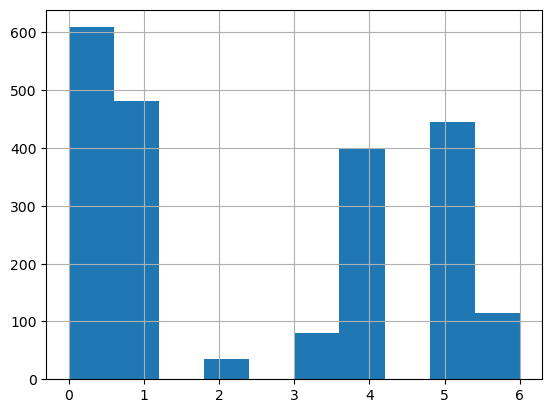

In [19]:
y_train.hist()

Oversampling
https://www.blog.trainindata.com/oversampling-techniques-for-imbalanced-data/


<Axes: >

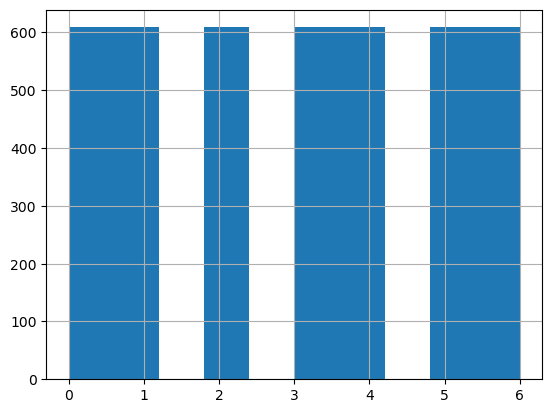

In [21]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df_nuevo.drop(columns="df_GrupoGastos"),
    df_nuevo["df_GrupoGastos"],
    test_size=0.2,
    shuffle=True,
    random_state=42
)

# Apply Random Oversampling to the training set
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled have balanced classes

y_train_resampled.hist()

In [22]:
X_train_resampled.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train_resampled.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [23]:
from sklearn.feature_selection import VarianceThreshold

# Inicializar el transformador para eliminar las características constantes (varianza 0)
selector = VarianceThreshold(threshold=0)

# Aplicar el transformador a los datos (X_train o tu conjunto de características)
X_reduced = selector.fit_transform(X_train)

# Para saber qué características fueron eliminadas:
removed_features = X_train.columns[~selector.get_support()]

print(f"Las características eliminadas son: {removed_features}")


Las características eliminadas son: Index([], dtype='object')


In [24]:
X_train=X_reduced

In [25]:
import sklearn
print(sklearn.__version__)

1.5.2


In [26]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


Modelo pipeline

In [28]:
from sklearn.tree import DecisionTreeClassifier   # Árbol de decisión
arbol = DecisionTreeClassifier()


from sklearn.ensemble import RandomForestClassifier   # Random forest
random_forest = RandomForestClassifier()


from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting
gradient_boosting = GradientBoostingClassifier()


from sklearn.preprocessing import StandardScaler     # importamos StandardScaler para realizar la estandarización cuando sea necesaria
from sklearn.feature_selection import RFECV, SelectKBest, f_classif  # importanmos RFECV y SeleckBest que los usaré para la selección de variables
from sklearn.linear_model import LogisticRegression

logreg_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LogisticRegression())),   #Aquí usamos regresión logística usando la selección RFECV
                               ("logreg",LogisticRegression())
                              ]
                       )

logreg_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                               ("kbest",SelectKBest()), # Aquí usamos la regresión logística con SelectKBest para selección de variables
                               ("logreg",LogisticRegression())
                              ]
                       )

from sklearn.neighbors import KNeighborsClassifier
neighbors = Pipeline(steps=[("scaler",StandardScaler()),  # KNeighbors sin realizar selección de variables.
                            ("knn",KNeighborsClassifier())
                          ]
                   )


neighbors_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                                  ("kbest",SelectKBest()),  # KNeighbors con selección de variables mediante el método SelectKBest
                                  ("knn",KNeighborsClassifier())
                                ]
                         )


from sklearn.svm import SVC
svm = Pipeline(steps=[("scaler",StandardScaler()), # Support Vector Machine, kernel es brf por defecto
                      ("svm",SVC())
                     ]
              )

svm_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                            ("kbest",SelectKBest()),    # Support Vector Machine, con método de selección kbest
                            ("svm",SVC())])



# Naïve Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_kbest = Pipeline(steps=[("kbest",SelectKBest()),
                           ("nb",GaussianNB())])


# Perceptrón multicapa sin elegir ningún tipo de selección:
from sklearn.neural_network import MLPClassifier

mlp = Pipeline(steps=[("scaler",StandardScaler()),
                      ("mlp",MLPClassifier())])


from sklearn.ensemble import BaggingClassifier
## Baggin tomando como estimador un árbol de decisión

dt = DecisionTreeClassifier()
bc = BaggingClassifier(estimator=dt, n_estimators=50, oob_score=True, random_state=1)


                            

## Adaboost de regresiones logísticas
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

# Use LogisticRegression as an estimator in BaggingClassifier
lr = LogisticRegression()
ab = BaggingClassifier(estimator=lr, n_estimators=50, random_state=1)

In [29]:
# Hiperparametros para los modelos

#Los modelos dependen de ciertos parámetros de entrada, estos parámetros deben decidirse antes de entrenar el modelo y una mejor o peor elección de los mismos dará mejores o peores resultados.

#Es posible crear una parrilla de parámetros para cada uno de los modelos y ser probados automáticamente a través de técnicas como GridSearchCV o RandomizedSearchCV.

#Hay ciertas técnicas que ayudan a seleccionar estos parámetros sin tener que hacer pruebas manuales probando combinaciones.  

In [30]:
grid_arbol = {"max_depth":list(range(1,11)) # Profundidades de 1 a 10
              }

grid_random_forest = {"n_estimators": [150],

                     "max_depth": [3,5,10,15,20],

                     "max_features": ["sqrt", 3, 4]                          }



grid_gradient_boosting = {"loss": ["deviance"],
                          "learning_rate": [0.05, 0.1, 0.5], # Una learning_rate alta
                                                             # junto con n_estimators alta puede dar sobreajuste.

                          "n_estimators": [20,50,100,200], # En GBT un número
                                                           # elevado de árboles puede darnos sobreajuste.

                          "max_depth": [1,2,3,4,5], # En boosting, los árboles utilizados deben tener poca
                                                    # profundidad ya que van rectificandose poco a poco de forma aditiva.

                          "subsample": [1.0, 0.8, 0.5], # Lo usamos para evitar el sobreentrenamiento

                          "max_features": ["sqrt", 3, 4],
                          }


# Ahora las Pipelines de regresiones logísticas:

grid_logreg_rfecv = {"rfecv__step": [1],
                     "rfecv__cv": [5],

                     "logreg__penalty": ["l1","l2"], # Regularizaciones L1 y L2 para evitar overfitting.
                     "logreg__C": [0.1, 0.8, 5.0], # Con este parámetro elegimos la fuerza de regulación
                     "logreg__fit_intercept": [True],

                     "logreg__max_iter": [50,100,500],

                     "logreg__solver": ["liblinear"]
                    }

grid_logreg_kbest = {"kbest__score_func": [f_classif],
                     "kbest__k": [1,2,3],   # El número de features con las que quedarse.

                     "logreg__penalty": ["l1","l2"],
                     "logreg__C": [0.1, 0.8, 5.0],
                     "logreg__fit_intercept": [True],
                     "logreg__max_iter": [50,100],
                     "logreg__solver": ["liblinear"]
                    }


# Nearest Neighbors:

grid_neighbors = {"knn__n_neighbors": [3,5,7,9,11],
                  "knn__weights": ["uniform","distance"]  # Pondera o no las clasificaciones en
                                                          # función de la inversa de la distancia a cada
                                                          # vecino
                  }

grid_neigbors_kbest = {"kbest__score_func": [f_classif],
                       "kbest__k": [1,2,3],
                       "knn__n_neighbors": [3,6,10],
                       "knn__weights": ["uniform","distance"]
                      }



grid_svm = {"svm__C": [0.1, 5.0, 50.0],
            "svm__kernel": ["rbf"],
            "svm__gamma": [0.001, 1, 10.0]
           }

grid_svm_kbest = {"kbest__score_func": [f_classif],
                  "kbest__k": [1,2,3],
                  "svm__C": [0.1, 5.0, 50.0],
                  "svm__kernel": ["rbf"],
                  "svm__gamma": [0.001, 1, 10.0]
                 }


# Naïve Bayes:

grid_nb_kbest = {"kbest__score_func": [f_classif],
                 "kbest__k": [1,2,3]
                }

# MLP:

grid_mlp = {"mlp__hidden_layer_sizes": [(4,),
                                        (4,4),
                                        (30,),
                                        (30,30)],

           "mlp__activation": ["logistic"],

           "mlp__solver": ["adam"],

           "mlp__alpha": [0.0, 0.1],

           "mlp__validation_fraction": [0.1],
           "mlp__early_stopping": [True],
           "mlp__max_iter": [3000],

           "mlp__learning_rate_init": [0.001, 0.1]
           }


grid_bc = {"n_estimators": [10, 20],
           "estimator__max_leaf_nodes":[5,15],
           "estimator__max_depth":[4,6]
          }

grid_ab= {"n_estimators":[5,10,30]
        
              }

In [31]:
#Grid search y entrenamiento:

In [32]:
from sklearn.model_selection import GridSearchCV

gs_ab= GridSearchCV(ab,
                    grid_ab,
                    cv=10,
                    scoring='f1_micro',
                    verbose=1,
                    n_jobs=-1)

gs_bc= GridSearchCV(bc,
                    grid_bc,
                    cv=10,
                    scoring='f1_micro',
                    verbose=1,
                    n_jobs=-1)


gs_arbol = GridSearchCV(arbol,
                        grid_arbol,
                        cv=10,
                        scoring="f1_micro",
                        verbose=1,
                        n_jobs=-1)

gs_random_forest = GridSearchCV(random_forest,
                                grid_random_forest,
                                cv=10,
                                scoring='f1_micro',
                                verbose=1,
                                n_jobs=-1)
gs_gradient_boosting = GridSearchCV(gradient_boosting,
                                    grid_gradient_boosting,
                                    cv=10,
                                    scoring='f1_micro',
                                    verbose=1,
                                    n_jobs=-1,
                                    error_score='raise') # Add this parameter

# Change the value of 'loss' in grid_gradient_boosting to 'log_loss'
for i, g in enumerate(grid_gradient_boosting):
    if 'loss' in g:
        grid_gradient_boosting['loss'] = ['log_loss']

gs_logreg_rfecv = GridSearchCV(logreg_rfecv,
                               grid_logreg_rfecv,
                               cv=10,
                               scoring='f1_micro',
                               verbose=1,
                               n_jobs=-1)

gs_logreg_kbest = GridSearchCV(logreg_kbest,
                               grid_logreg_kbest,
                               cv=10,
                               scoring='f1_micro',
                               verbose=1,
                               n_jobs=-1)

gs_neighbors = GridSearchCV(neighbors,
                            grid_neighbors,
                            cv=10,
                            scoring='f1_micro',
                            verbose=1,
                            n_jobs=-1)

gs_neighbors_kbest = GridSearchCV(neighbors_kbest,
                                  grid_neigbors_kbest,
                                  cv=10,
                                  scoring='f1_micro',
                                  verbose=1,
                                  n_jobs=-1)

gs_svm = GridSearchCV(svm,
                      grid_svm,
                      cv=10,
                      scoring='f1_micro',
                      verbose=1,
                      n_jobs=-1)

gs_svm_kbest = GridSearchCV(svm_kbest,
                            grid_svm_kbest,
                            cv=10,
                            scoring='f1_micro',
                            verbose=1,
                            n_jobs=-1)

gs_nb = GridSearchCV(nb,
                     {},  # No hay grid
                     cv=10,
                     scoring='f1_micro',
                     verbose=1,
                     n_jobs=-1)

gs_nb_kbest = GridSearchCV(nb_kbest,
                           grid_nb_kbest,
                           cv=10,
                           scoring='f1_micro',
                           verbose=1,
                           n_jobs=-1)

gs_mlpC = GridSearchCV(mlp,
                      grid_mlp,
                      cv=10,
                      scoring='f1_micro',
                      verbose=1,
                      n_jobs=-1)

Entrenamiento
solo con los 4 mejores

In [34]:

'''todos_los_grid_searchs = {"gs_arbol":gs_arbol,
                          "gs_random_forest":gs_random_forest,
                          "gs_gradient_boosting":gs_gradient_boosting,
                          "gs_logreg_rfecv":gs_logreg_rfecv,
                          "gs_logreg_kbest":gs_logreg_kbest,
                          "gs_neighbors":gs_neighbors,
                          "gs_neighbors_kbest":gs_neighbors_kbest,
                          "gs_svm":gs_svm,
                          "gs_svm_kbest":gs_svm_kbest,
                          "gs_nb":gs_nb,
                          "gs_nb_kbest":gs_nb_kbest,
                          "gs_mlpC":gs_mlpC,
                          "gs_bc": gs_bc,
                          "gs_ab": gs_ab}'''

todos_los_grid_searchs = {"gs_neighbors":gs_neighbors,
                              "gs_mlpC":gs_mlpC,
                        "gs_neighbors_kbest":gs_neighbors_kbest,
                              "gs_svm_kbest":gs_svm_kbest,
                              "gs_nb_kbest":gs_nb_kbest,
                          "gs_bc": gs_bc,
                          "gs_ab": gs_ab,
                              "gs_nb":gs_nb,
                          "gs_svm":gs_svm,
                            "gs_arbol":gs_arbol,
                          "gs_random_forest":gs_random_forest,
                          "gs_gradient_boosting":gs_gradient_boosting}

todos_los_grid_searchs = {"gs_neighbors":gs_neighbors,
                          "gs_svm":gs_svm,
                          "gs_random_forest":gs_random_forest,
                          "gs_gradient_boosting":gs_gradient_boosting}


In [35]:
import time

start = time.time()

In [36]:
for nombre, grid_search in todos_los_grid_searchs.items():
    print("Haciendo Grid Search de %s..." % nombre)
    grid_search.fit(X_train_resampled, y_train_resampled)

Haciendo Grid Search de gs_neighbors...
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Haciendo Grid Search de gs_svm...
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Haciendo Grid Search de gs_random_forest...
Fitting 10 folds for each of 15 candidates, totalling 150 fits


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Haciendo Grid Search de gs_gradient_boosting...
Fitting 10 folds for each of 540 candidates, totalling 5400 fits


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [37]:
print("Los segundos transcurridos son:")

end = time.time()

print(end - start)

Los segundos transcurridos son:
4774.66303896904


In [38]:
mejor_score_de_cada_gridsearch = [(nombre_modelo, grid_search.best_score_) # Generamos una tupla
                                  for nombre_modelo, grid_search           # por cada par clave-valor
                                  in todos_los_grid_searchs.items()]       # del diccionario

mejor_score_de_cada_gridsearch

[('gs_neighbors', 0.9134544974766634),
 ('gs_svm', 0.9223675385647215),
 ('gs_random_forest', 0.9678667634220626),
 ('gs_gradient_boosting', 0.9803009312706841)]

In [39]:
mejor_score_de_cada_gridsearch_df = pd.DataFrame(mejor_score_de_cada_gridsearch,
                                                 columns=["GridSearchCV", "Mejor score"])

mejor_score_de_cada_gridsearch_df_ordenado = (mejor_score_de_cada_gridsearch_df
                                              .sort_values(by="Mejor score", ascending=False)
                                             )

mejor_score_de_cada_gridsearch_df_ordenado

,GridSearchCV,Mejor score
3,gs_gradient_boosting,0.980301
2,gs_random_forest,0.967867
1,gs_svm,0.922368
0,gs_neighbors,0.913454


In [40]:
#la mejor puntuación es de gs_gradient_boosting

In [41]:
mejor_gridsearch_clas = todos_los_grid_searchs["gs_gradient_boosting"]

In [42]:
mejor_pipeline = mejor_gridsearch_clas.best_estimator_
mejor_pipeline
mejor_pipeline.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.5,
 'loss': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [43]:
mejor_pipeline.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, max_features='sqrt',
                           n_estimators=200)

In [44]:
from sklearn.metrics import f1_score

f1_en_test = f1_score(y_true = y_test,
                                  y_pred = mejor_pipeline.predict(X_test), average="micro"
                                 )

print("El modelo tiene un f1 en el conjunto de test de %s" % f1_en_test)

#from sklearn.metrics import accuracy_score

#accuracy_en_test = accuracy_score(y_true = y_test,
                                #  y_pred = mejor_pipeline.predict(X_test)
                               #  )
#
#print("El modelo tiene un accuracy en el conjunto de test de %s" % accuracy_en_test)

El modelo tiene un f1 en el conjunto de test de 0.933456561922366


In [45]:
# classification report
classr = classification_report(y_test, mejor_pipeline.predict(X_test))
print(classr)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       165
           1       0.99      0.99      0.99       112
           2       0.87      0.93      0.90        14
           3       0.88      0.88      0.88        16
           4       0.97      0.96      0.96        99
           5       0.93      0.87      0.90       113
           6       0.88      0.95      0.91        22

    accuracy                           0.93       541
   macro avg       0.92      0.93      0.92       541
weighted avg       0.93      0.93      0.93       541



In [46]:
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(y_true = y_test,
                                    y_pred = mejor_pipeline.predict(X_test)
                                   )
matriz_confusion

array([[153,   0,   2,   0,   2,   7,   1],
       [  0, 111,   0,   1,   0,   0,   0],
       [  0,   0,  13,   1,   0,   0,   0],
       [  1,   1,   0,  14,   0,   0,   0],
       [  3,   0,   0,   0,  95,   0,   1],
       [ 13,   0,   0,   0,   1,  98,   1],
       [  1,   0,   0,   0,   0,   0,  21]])

In [47]:
matriz_confusion_df = pd.DataFrame(matriz_confusion)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df.columns.name = "Predicción"
matriz_confusion_df.index.name = "Real"
matriz_confusion_df

Predicción,0,1,2,3,4,5,6
Real,,,,,,,
0,153,0,2,0,2,7,1
1,0,111,0,1,0,0,0
2,0,0,13,1,0,0,0
3,1,1,0,14,0,0,0
4,3,0,0,0,95,0,1
5,13,0,0,0,1,98,1
6,1,0,0,0,0,0,21


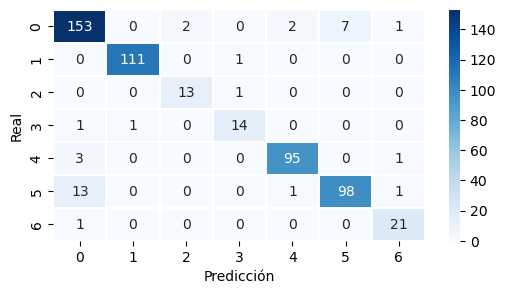

In [48]:
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df,
            annot=True,
            cmap="Blues",linewidths=.10, fmt= '.0f')
pass

In [49]:
mejor_gridsearch_clas = todos_los_grid_searchs["gs_gradient_boosting"]

In [50]:
mejor_pipeline = mejor_gridsearch_clas.best_estimator_
mejor_pipeline
mejor_pipeline.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.5,
 'loss': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [51]:
mejor_pipeline.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, max_features='sqrt',
                           n_estimators=200)

In [52]:
from sklearn.metrics import f1_score

f1_en_test = f1_score(y_true = y_test,
                                  y_pred = mejor_pipeline.predict(X_test), average="micro"
                                 )

print("El modelo tiene un f1 en el conjunto de test de %s" % f1_en_test)

#from sklearn.metrics import accuracy_score

#accuracy_en_test = accuracy_score(y_true = y_test,
                                #  y_pred = mejor_pipeline.predict(X_test)
                               #  )
#
#print("El modelo tiene un accuracy en el conjunto de test de %s" % accuracy_en_test)

El modelo tiene un f1 en el conjunto de test de 0.9390018484288355


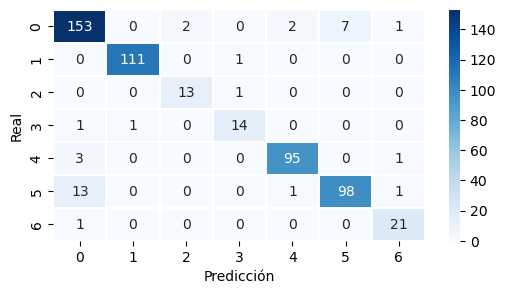

In [53]:
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df,
            annot=True,
            cmap="Blues",linewidths=.10, fmt= '.0f')
pass

In [54]:
##### 2 gs_random_forest

In [55]:
mejor_gridsearch_clas = todos_los_grid_searchs["gs_random_forest"]

In [56]:
mejor_pipeline = mejor_gridsearch_clas.best_estimator_
mejor_pipeline
mejor_pipeline.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [57]:
mejor_pipeline.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=20, max_features=3, n_estimators=150)

In [58]:
from sklearn.metrics import f1_score

f1_en_test = f1_score(y_true = y_test,
                                  y_pred = mejor_pipeline.predict(X_test), average="micro"
                                 )

print("El modelo tiene un f1 en el conjunto de test de %s" % f1_en_test)

#from sklearn.metrics import accuracy_score

#accuracy_en_test = accuracy_score(y_true = y_test,
                                #  y_pred = mejor_pipeline.predict(X_test)
                               #  )
#
#print("El modelo tiene un accuracy en el conjunto de test de %s" % accuracy_en_test)

El modelo tiene un f1 en el conjunto de test de 0.8853974121996303


In [59]:
# classification report
classr = classification_report(y_test, mejor_pipeline.predict(X_test))
print(classr)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       165
           1       0.99      0.96      0.98       112
           2       0.80      0.86      0.83        14
           3       0.75      0.94      0.83        16
           4       0.92      0.95      0.94        99
           5       0.81      0.81      0.81       113
           6       0.90      0.86      0.88        22

    accuracy                           0.89       541
   macro avg       0.86      0.89      0.87       541
weighted avg       0.89      0.89      0.89       541



Hiperparametros para los modelos
Los modelos dependen de ciertos parámetros de entrada, estos parámetros deben decidirse antes de entrenar el modelo y una mejor o peor elección de los mismos dará mejores o peores resultados.

Es posible crear una parrilla de parámetros para cada uno de los modelos y ser probados automáticamente a través de técnicas como GridSearchCV o RandomizedSearchCV.

Hay ciertas técnicas que ayudan a seleccionar estos parámetros sin tener que hacer pruebas manuales probando combinaciones.

In [61]:
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(y_true = y_test,
                                    y_pred = mejor_pipeline.predict(X_test)
                                   )

In [62]:
matriz_confusion_df = pd.DataFrame(matriz_confusion)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df.columns.name = "Predicción"
matriz_confusion_df.index.name = "Real"
matriz_confusion_df

Predicción,0,1,2,3,4,5,6
Real,,,,,,,
0,139,0,2,1,6,16,1
1,0,108,0,2,0,2,0
2,0,0,12,2,0,0,0
3,1,0,0,15,0,0,0
4,2,1,0,0,94,1,1
5,19,0,0,0,2,92,0
6,0,0,1,0,0,2,19


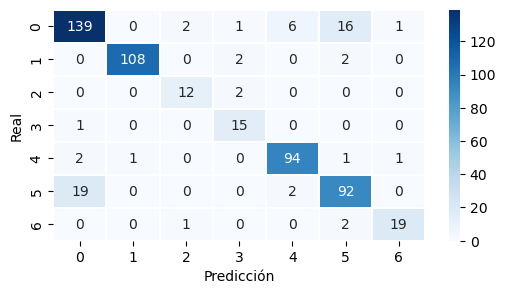

In [63]:
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df,
            annot=True,
            cmap="Blues",linewidths=.10, fmt= '.0f')
pass

In [64]:
###### 3 gs_neighbors

In [65]:
mejor_gridsearch_clas = todos_los_grid_searchs["gs_neighbors"]

In [66]:
mejor_pipeline = mejor_gridsearch_clas.best_estimator_
mejor_pipeline
mejor_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=3, weights='distance'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=3, weights='distance'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'distance'}

In [67]:
mejor_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])

In [68]:
from sklearn.metrics import f1_score

f1_en_test = f1_score(y_true = y_test,
                                  y_pred = mejor_pipeline.predict(X_test), average="micro"
                                 )

print("El modelo tiene un f1 en el conjunto de test de %s" % f1_en_test)

#from sklearn.metrics import accuracy_score

#accuracy_en_test = accuracy_score(y_true = y_test,
                                #  y_pred = mejor_pipeline.predict(X_test)
                               #  )
#
#print("El modelo tiene un accuracy en el conjunto de test de %s" % accuracy_en_test)

El modelo tiene un f1 en el conjunto de test de 0.7375231053604436


In [69]:
# classification report
classr = classification_report(y_test, mejor_pipeline.predict(X_test))
print(classr)

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       165
           1       0.90      0.92      0.91       112
           2       0.81      0.93      0.87        14
           3       0.24      0.44      0.31        16
           4       0.79      0.82      0.81        99
           5       0.67      0.71      0.69       113
           6       0.55      0.73      0.63        22

    accuracy                           0.74       541
   macro avg       0.68      0.73      0.70       541
weighted avg       0.75      0.74      0.74       541



In [70]:
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(y_true = y_test,
                                    y_pred = mejor_pipeline.predict(X_test)
                                   )

In [71]:
matriz_confusion_df = pd.DataFrame(matriz_confusion)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df.columns.name = "Predicción"
matriz_confusion_df.index.name = "Real"
matriz_confusion_df

Predicción,0,1,2,3,4,5,6
Real,,,,,,,
0,99,8,2,10,11,29,6
1,3,103,0,2,0,3,1
2,0,0,13,1,0,0,0
3,3,1,1,7,0,2,2
4,8,1,0,2,81,5,2
5,15,1,0,7,8,80,2
6,3,0,0,0,2,1,16


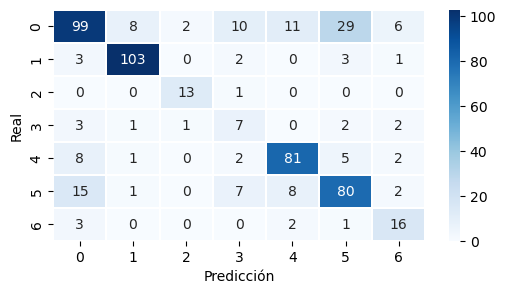

In [72]:
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df,
            annot=True,
            cmap="Blues",linewidths=.10, fmt= '.0f')
pass